In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../src/')
import plotter

## Importing data points

In [2]:
f = open('data/ES_mut_rate_Dx=0.5.tsv', 'r')
dx1 = 0.5

r0_list1, f_tips1, s_tips1 = np.array([]), np.array([]), np.array([])
D_list1, D_tip1, D_FKPP1, D_lin1 = np.array([]), np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list1 = np.append(r0_list1, float(line.split('\t')[0]))
    D_list1 = np.append(D_list1, float(line.split('\t')[1]))
    D_tip1 = np.append(D_tip1, float(line.split('\t')[2]))
    f_tips1 = np.append(f_tips1, float(line.split('\t')[3]))
    s_tips1 = np.append(s_tips1, float(line.split('\t')[4]))
    D_FKPP1 = np.append(D_FKPP1, float(line.split('\t')[5]))
    if line.split('\t')[6] == '':
        D_lin1 = np.append(D_lin1, float('nan'))
    else:
        D_lin1 = np.append(D_lin1, float(line.split('\t')[6]))
    
f.close()


f = open('data/ES_mut_rate_Dx=1.tsv', 'r')
dx2 = 1

r0_list2, f_tips2, s_tips2 = np.array([]), np.array([]), np.array([])
D_list2, D_tip2, D_FKPP2, D_lin2 = np.array([]), np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list2 = np.append(r0_list2, float(line.split('\t')[0]))
    D_list2 = np.append(D_list2, float(line.split('\t')[1]))
    D_tip2 = np.append(D_tip2, float(line.split('\t')[2]))
    f_tips2 = np.append(f_tips2, float(line.split('\t')[3]))
    s_tips2 = np.append(s_tips2, float(line.split('\t')[4]))
    D_FKPP2 = np.append(D_FKPP2, float(line.split('\t')[5]))
    if line.split('\t')[6] == '':
        D_lin2 = np.append(D_lin2, float('nan'))
    else:
        D_lin2 = np.append(D_lin2, float(line.split('\t')[6]))
    
f.close()


f = open('data/ES_mut_rate_Dx=2.tsv', 'r')
dx3 = 2

r0_list3, f_tips3, s_tips3 = np.array([]), np.array([]), np.array([])
D_list3, D_tip3, D_FKPP3, D_lin3 = np.array([]), np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list3 = np.append(r0_list3, float(line.split('\t')[0]))
    D_list3 = np.append(D_list3, float(line.split('\t')[1]))
    D_tip3 = np.append(D_tip3, float(line.split('\t')[2]))
    f_tips3 = np.append(f_tips3, float(line.split('\t')[3]))
    s_tips3 = np.append(s_tips3, float(line.split('\t')[4]))
    D_FKPP3 = np.append(D_FKPP3, float(line.split('\t')[5]))
    if line.split('\t')[6] == '':
        D_lin3 = np.append(D_lin3, float('nan'))
    else:
        D_lin3 = np.append(D_lin3, float(line.split('\t')[6]))
    
f.close()


f = open('data/ES_mut_rate_stoch.tsv', 'r')

r0_list_stoch, f_tips_stoch, s_tips_stoch = np.array([]), np.array([]), np.array([])
D_list_stoch, D_tip_stoch, D_std = np.array([]), np.array([]), np.array([])
for line in f.readlines():
    if line[0] == '#':
        continue
        
    r0_list_stoch = np.append(r0_list_stoch, float(line.split('\t')[0]))
    D_list_stoch = np.append(D_list_stoch, float(line.split('\t')[1]))
    D_std = np.append(D_std, float(line.split('\t')[2]))
    D_tip_stoch = np.append(D_tip_stoch, float(line.split('\t')[3]))
    f_tips_stoch = np.append(f_tips_stoch, float(line.split('\t')[4]))
    s_tips_stoch = np.append(s_tips_stoch, float(line.split('\t')[5]))
    
f.close()

f = open('data/ES_mut_rate_stoch_pars.tsv', 'r')
lines = f.readlines()
l_stoch = float(lines[1].split('\t')[1])
gamma_stoch = float(lines[4].split('\t')[1])
f.close()

## Discrete vs contiunous

## Delta x rescaling

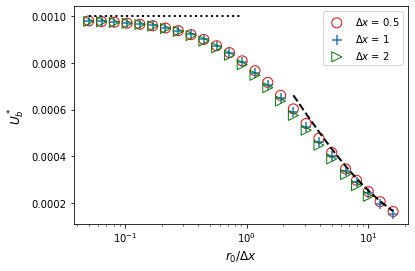

In [4]:
plt.xscale('log')
plt.xlabel('$r_0/\Delta x$', fontsize=12)
plt.ylabel(r'$U_b^*$', fontsize=12)
plt.scatter(r0_list1/dx1, 2*D_list1/dx1**2, marker='o', facecolors='none', edgecolors='r', s=100, label=r'$\Delta x$ = 0.5')
plt.scatter(r0_list2/dx2, 2*D_list2/dx2**2, marker='+', s=100, label=r'$\Delta x$ = 1')
plt.scatter(r0_list3/dx3, 2*D_list3/dx3**2, marker='>', edgecolors='g', facecolors='none', s=100, label=r'$\Delta x$ = 2')

plt.legend()

plt.plot(r0_list2[r0_list2 > 2], D_lin2[r0_list2 > 2]*2, c='k', ls='--', lw=2)
plt.plot(r0_list2[r0_list2 < 1], D_FKPP2[r0_list2 < 1]*2, c='k', ls=':', lw=2)

#r0_FKPP_end = 10
#plt.plot(r0s[r0s < r0_FKPP_end], np.ones(len(r0s[r0s < r0_FKPP_end]))*D_FKPP*2, c='k', ls=':', lw=2)

plt.savefig('plots/es_mut_rate_Dx.svg', dpi=200)

## ES mutation rate stochastic

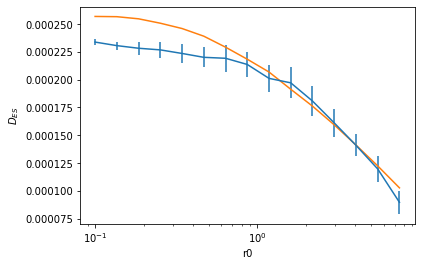

In [31]:
plt.xscale('log')
#plt.scatter(r0_list, mean_D, c='k', label='average D')
plt.errorbar(r0_list_stoch, D_list_stoch, yerr=D_std)
plt.plot(r0_list_stoch, D_tip_stoch)
plt.xlabel('r0')
plt.ylabel(r'$D_{ES}$')

plt.savefig('plots/es_mut_rate_stoch.svg', dpi=200)